Import

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.under_sampling import TomekLinks

Load Data

In [18]:
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/cleandata.csv')

x=data.iloc[:, :-1]
y = data.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)

In [19]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

Split the data into training and testing sets

Train the Logistic Regression model

In [20]:
lr = LogisticRegression(random_state=48,solver="liblinear")
lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


Calculate the accuracy of the model

In [15]:
def accurracy(y_true,y_pred_test):
    return np.sum(y_true==y_pred_test)/len(y_true)
print('Accuracy  classification :',accurracy(y_test,y_pred_test))


Accuracy  classification : 0.8375209380234506


Calculate the classification report of the model


Training Accuracy score: 0.8336923739767341
Testing Accuracy score: 0.8089500860585198
classification_report 
               precision    recall  f1-score   support

         0.0       0.96      0.57      0.71       244
         1.0       0.76      0.98      0.86       337

    accuracy                           0.81       581
   macro avg       0.86      0.78      0.79       581
weighted avg       0.84      0.81      0.80       581



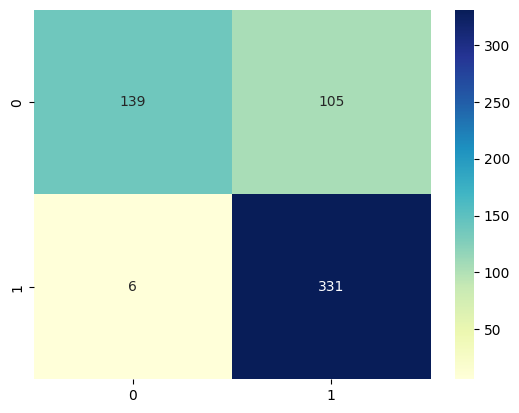

In [21]:
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
